In [1]:
## importing dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input = "In the town of Athy one Jeremy Lanigan\n Battered away til he hadnt a pound.\n His father died and made him a man again\n Left him a farm and ten acres of ground.\n He gave a grand party for friends and relations\n Who didnt forget him when come to the wall,\n And if youll but listen Ill make your eyes glisten\n Of the rows and the ructions of Lanigan’s Ball.\n Myself to be sure got free invitation,\n For all the nice girls and boys I might ask,\n And just in a minute both friends and relations\n Were dancing round merry as bees round a cask.\n Judy ODaly, that nice little milliner,\n She tipped me a wink for to give her a call,\n And I soon arrived with Peggy McGilligan\n Just in time for Lanigans Ball."

In [3]:
tokenizer = Tokenizer()
corpus = input.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1
print(total_words)

97


In [4]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range (1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)
print(input_sequences[:5])

[[6, 3], [6, 3, 17], [6, 3, 17, 4], [6, 3, 17, 4, 18], [6, 3, 17, 4, 18, 19]]


In [5]:
print(pad_sequences(input_sequences[:10]))

[[ 0  0  0  0  0  0  6  3]
 [ 0  0  0  0  0  6  3 17]
 [ 0  0  0  0  6  3 17  4]
 [ 0  0  0  6  3 17  4 18]
 [ 0  0  6  3 17  4 18 19]
 [ 0  6  3 17  4 18 19 20]
 [ 6  3 17  4 18 19 20 21]
 [ 0  0  0  0  0  0 22 23]
 [ 0  0  0  0  0 22 23 24]
 [ 0  0  0  0 22 23 24  9]]


In [6]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(
    input_sequences, maxlen=max_sequence_len, padding='pre'))
print(input_sequences)

[[ 0  0  0 ...  0  6  3]
 [ 0  0  0 ...  6  3 17]
 [ 0  0  0 ...  3 17  4]
 ...
 [ 0  0  0 ...  6 95  5]
 [ 0  0  0 ... 95  5 96]
 [ 0  0  0 ...  5 96 12]]


In [7]:
## spliting to featue and labels
xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]

In [8]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
print(ys)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


## Creating the model

In [9]:
model = Sequential()
model.add(tf.keras.layers.Embedding(total_words,8))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len-1)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
history = model.fit(xs, ys, epochs=1000, verbose=1)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.0000e+00 - loss: 4.5750
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0257 - loss: 4.5731 
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0408 - loss: 4.5695
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0454 - loss: 4.5673    
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0316 - loss: 4.5654     
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0441 - loss: 4.5624
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0348 - loss: 4.5589    
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0618 - loss: 4.5531 
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0493 - loss: 4.5483
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0618 - loss: 4.5395
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0410 - loss: 4.5362
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12

In [12]:
## Creating function to display the graph
def plot_graph(fitted_history):
  epochs = range(1, len(fitted_history.history['accuracy']) + 1)
  plt.figure(figsize=(10,6))
  plt.plot(epochs, fitted_history.history['accuracy'])
  plt.xlabel('Epochs')
  plt.ylabel('accuracy')
  plt.show()

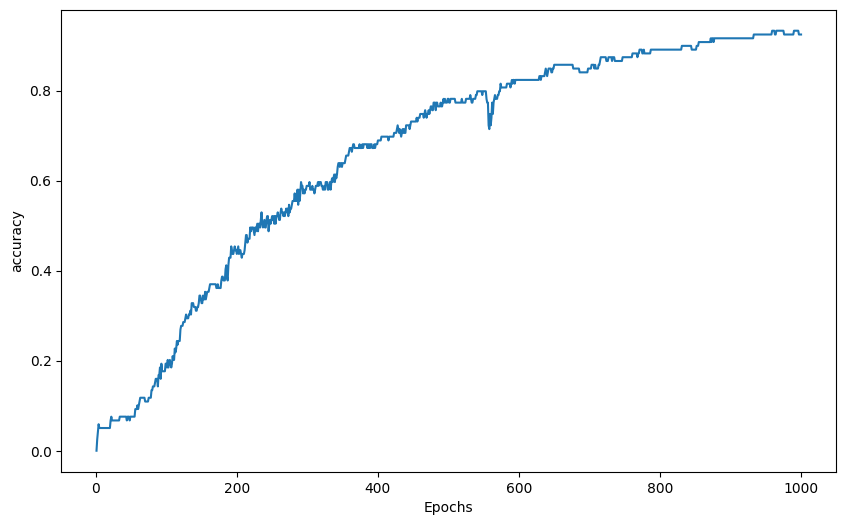

In [13]:
plot_graph(history)

## Predicting Text

In [14]:
seed_text = "in the town of athy"

In [15]:
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
predicted = np.argmax(model.predict(token_list), axis=-1)
print(predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
[19]


In [16]:
for word, index in tokenizer.word_index.items():
  if index == predicted:
    print(word)
    break

one


## compounding predictions to generate text

In [17]:
seed_text = "sweet jeremy saw dublin"
next_words = 10
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
  predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word += word
      break
  seed_text += " " + output_word
print(seed_text)

sweet jeremy saw dublin him and lanigans ball when farm and ten glisten glisten


## Extending the Dataset

In [18]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt

--2025-07-28 14:55:15--  https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘irish-lyrics-eof.txt.1’

irish-lyrics-eof.tx 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2025-07-28 14:55:15 (82.5 MB/s) - ‘irish-lyrics-eof.txt.1’ saved [68970/68970]



In [19]:
data = open('/content/irish-lyrics-eof.txt').read()
corpus = data.lower().split('\n')

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1

input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range (1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(
    input_sequences, maxlen=max_sequence_len, padding='pre'))

xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

## Changing model architecture

In [21]:
model = Sequential()
model.add(tf.keras.layers.Embedding(total_words,8))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len-1, return_sequences="True")))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len-1)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history1 = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.0610 - loss: 7.1790
Epoch 2/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0651 - loss: 6.3799
Epoch 3/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0640 - loss: 6.2900
Epoch 4/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0689 - loss: 6.1928
Epoch 5/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0763 - loss: 6.1091
Epoch 6/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0765 - loss: 6.0570
Epoch 7/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0824 - loss: 6.0038
Epoch 8/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0792 - loss: 5.9812
Epoch 9/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.0854 - loss: 5.9071
Epoch 10/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0822 - loss: 5.8750
Epoch 11/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0800 - loss: 5.8421
Epoch 12/100
377/377 ━━━━━━━━━

In [23]:
seed_text = "sweet jeremy saw dublin"
next_words = 100
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
  predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word += word
      break
  seed_text += " " + output_word
print(seed_text)

sweet jeremy saw dublin old woman their heart and a casey boy her ral are love i was been her coffee and a casey eer the casey shining ral of the sea on the touch of toome today fell and fray there today boo there today charming bonny craw died in the mbó ones to a casey death her ra casey boy loud and the sea i did the upwards trace tree in the touch of toome today sang your brand brand journey and fray fray the mbó ones to torn and the mbó shining journey today and toome today fell boo there casey


## Improving the Data

In [30]:
window_size = 10
sentences = []
alltext = []
data = open('/content/irish-lyrics-eof.txt').read()
corpus = data.lower()
words = corpus.split(" ")
for i in range(len(words) - window_size):
  sentence = " ".join(words[i:i+window_size])
  sentences.append(sentence)

In [31]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
tokenizer.index_word = {v: k for k, v in tokenizer.word_index.items()}
total_words = len(tokenizer.word_index)+1

input_sequences = []
for line in sentences:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range (1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(
    input_sequences, maxlen=max_sequence_len, padding='pre'))

xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [32]:
model = Sequential()
model.add(tf.keras.layers.Embedding(total_words,16))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.00003,beta_1=0.90, beta_2=0.999, amsgrad=False),
              metrics=['accuracy'])

history1 = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
3914/3914 ━━━━━━━━━━━━━━━━━━━━ 51s 12ms/step - accuracy: 0.0582 - loss: 7.0669
Epoch 2/100
3914/3914 ━━━━━━━━━━━━━━━━━━━━ 57s 14ms/step - accuracy: 0.0638 - loss: 6.3049
Epoch 3/100
3914/3914 ━━━━━━━━━━━━━━━━━━━━ 72s 12ms/step - accuracy: 0.0630 - loss: 6.2943
Epoch 4/100
3914/3914 ━━━━━━━━━━━━━━━━━━━━ 83s 12ms/step - accuracy: 0.0628 - loss: 6.2344
Epoch 5/100
3914/3914 ━━━━━━━━━━━━━━━━━━━━ 47s 12ms/step - accuracy: 0.0665 - loss: 6.1677
Epoch 6/100
3914/3914 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - accuracy: 0.0661 - loss: 6.0860
Epoch 7/100
3914/3914 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - accuracy: 0.0652 - loss: 6.0388
Epoch 8/100
3914/3914 ━━━━━━━━━━━━━━━━━━━━ 83s 12ms/step - accuracy: 0.0667 - loss: 6.0012
Epoch 9/100
3914/3914 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - accuracy: 0.0730 - loss: 5.9486
Epoch 10/100
3914/3914 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - accuracy: 0.0755 - loss: 5.9195
Epoch 11/100
3914/3914 ━━━━━━━━━━━━━━━━━━━━ 48s 12ms/step - accuracy: 0.0789 - loss: 5.87

In [39]:
seed_text = "sweet jeremy saw dublin"
next_words = 100
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
  preds = model.predict(token_list, verbose=0)[0]
  preds = np.log(preds + 1e-7) / 0.8
  exp_preds = np.exp(preds)
  preds = exp_preds / np.sum(exp_preds)
  predicted = np.random.choice(range(total_words), p=preds)
  output_word = tokenizer.index_word.get(predicted, "")
  seed_text += " " + output_word
print(seed_text)

sweet jeremy saw dublin comes like the water fell and when me love the parlour me me my color stones i be who never beautiful proud out and summer go and my own and thou as the look and the light of my drop of laid the foot danced from a purse and when i tell i put to like on all and gathers it there of i walkin sweet smile in and hope for a new young beaming and i was not thee the foaming early is and like me i go the name are still i well the comrades of two corporal


## Saving model

In [44]:
from keras.saving import save_model
save_model(model, '/content/drive/MyDrive/ScriptLoom/scriptloom.keras')